In [1]:
import pandas as pd
import numpy as np
from datasets import load_dataset, Dataset
from mediapipe_handler import MediaPipeHandler, add_new_label

d:\stuff\uni bruv\Year 3\DESD2\DesD_AI_pathway\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = load_dataset("averrous/workout")
new_ds = ds.map(add_new_label)

# train = new_ds['train']
test = new_ds['test']
# validation = new_ds['validation']

# train = pd.DataFrame(train)
test = pd.DataFrame(test)
# validation = pd.DataFrame(validation)

In [3]:
media_pipe_handler = MediaPipeHandler()

#train_new = media_pipe_handler.pandas_add_detections_from_image_and_remove_nulls(train)
test_new = media_pipe_handler.pandas_add_detections_from_image_and_remove_nulls(test)
# test_new.to_csv('data/test_new.csv', index=False)
# validation_new = media_pipe_handler.pandas_add_detections_from_image(validation)

predicted image 0 from 1403, time: 0.0731048583984375, type: <class 'numpy.ndarray'>
predicted image 1 from 1403, time: 0.06056547164916992, type: <class 'numpy.ndarray'>
predicted image 2 from 1403, time: 0.05892062187194824, type: <class 'numpy.ndarray'>
predicted image 3 from 1403, time: 0.05465054512023926, type: <class 'numpy.ndarray'>
predicted image 4 from 1403, time: 0.05562925338745117, type: <class 'numpy.ndarray'>
predicted image 5 from 1403, time: 0.06305789947509766, type: <class 'numpy.ndarray'>
predicted image 6 from 1403, time: 0.07262325286865234, type: <class 'numpy.ndarray'>
predicted image 7 from 1403, time: 0.0800166130065918, type: <class 'numpy.ndarray'>
predicted image 8 from 1403, time: 0.08059334754943848, type: <class 'numpy.ndarray'>
predicted image 9 from 1403, time: 0.0861048698425293, type: <class 'numpy.ndarray'>
predicted image 10 from 1403, time: 0.07840871810913086, type: <class 'numpy.ndarray'>
predicted image 11 from 1403, time: 0.07952117919921875,

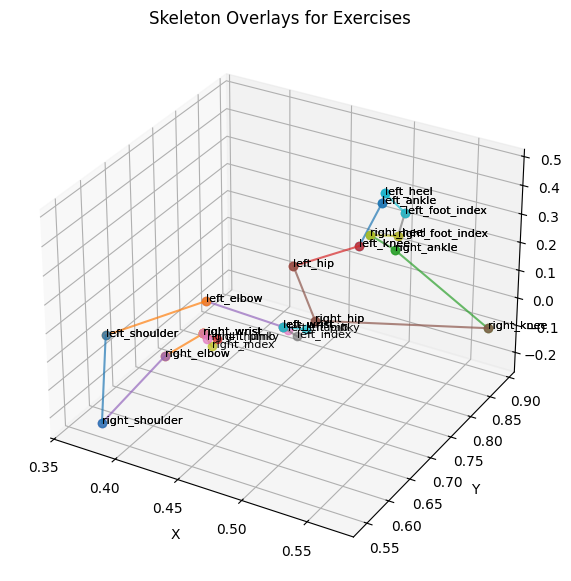

In [39]:
import matplotlib.pyplot as plt
import PIL.Image as pl
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

def normalise_pose(joint_coords, joint_names):
    # Get indices for key joints
    left_hip_idx = joint_names.get_loc("left_hip")
    right_hip_idx = joint_names.get_loc("right_hip")
    left_shoulder_idx = joint_names.get_loc("left_shoulder")
    right_shoulder_idx = joint_names.get_loc("right_shoulder")

    # Compute hip midpoint (translation step)
    hip_midpoint = (joint_coords[left_hip_idx] + joint_coords[right_hip_idx]) / 2
    for j in joint_names:
        if (j != "image") and (j != "label") and (j != "muscle group"):
            joint_coords[j] -= hip_midpoint  # Translate all points so hips are at origin

    # Compute shoulder width (scaling step)
    # shoulder_width = np.linalg.norm(joint_coords[left_shoulder_idx] - joint_coords[right_shoulder_idx])
    # if shoulder_width > 0:
    #     joint_coords /= shoulder_width  # Normalize by shoulder width to maintain scale

######

    # # Compute shoulder vector
    # shoulder_vector = joint_coords[right_shoulder_idx] - joint_coords[left_shoulder_idx]
    # shoulder_vector /= np.linalg.norm(shoulder_vector)  # Normalize

    # # Desired X-axis unit vector
    # target_vector = np.array([1, 0, 0])

    # # Compute rotation axis (cross product of shoulder vector and target X-axis)
    # rotation_axis = np.cross(shoulder_vector, target_vector)
    # rotation_axis /= np.linalg.norm(rotation_axis)  # Normalize

    # # Compute rotation angle (dot product)
    # angle = np.arccos(np.dot(shoulder_vector, target_vector))

    # # Construct rotation matrix using Rodrigues' formula
    # K = np.array([[0, -rotation_axis[2], rotation_axis[1]],
    #               [rotation_axis[2], 0, -rotation_axis[0]],
    #               [-rotation_axis[1], rotation_axis[0], 0]])

    # R = np.eye(3) + np.sin(angle) * K + (1 - np.cos(angle)) * np.dot(K, K)

    # # Apply rotation
    # joint_coords = np.dot(joint_coords, R.T)  # Rotate all joints

    return joint_coords


# Define joint connections (indices based on typical MediaPipe model)
joint_pairs = {
    ('left_shoulder', 'right_shoulder'),
    ('right_shoulder', 'right_elbow'),
    ('right_elbow', 'right_wrist'),
    ('left_shoulder', 'left_elbow'),
    ('left_elbow', 'left_wrist'),
    ('right_wrist', 'right_pinky'),
    ('right_wrist', 'right_index'),
    ('right_wrist', 'right_thumb'),
    ('left_wrist', 'left_pinky'),
    ('left_wrist', 'left_index'),
    ('left_wrist', 'left_thumb'),
    ('left_hip', 'right_hip'),
    ('left_hip', 'left_knee'),
    ('right_hip', 'right_knee'),
    ('left_knee', 'left_ankle'),
    ('right_knee', 'right_ankle'),
    ('left_ankle', 'left_heel'),
    ('right_ankle', 'right_heel'),
    ('left_heel', 'left_foot_index'),
    ('right_heel', 'right_foot_index'),
    ('left_foot_index', 'right_foot_index')
}

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = 8
for i in range (x,x+1):
    exercise = i
    exercise_data = test_new[test_new["label"]==i]
    #exercise_data = exercise_data.drop(columns=["image", "label", "muscle group"])
    for index, row in exercise_data.head(1).iterrows():
            for joint1, joint2 in joint_pairs:
                # new_row = normalise_pose(row, exercise_data.columns)
                # x1, y1, z1 = new_row[joint1]
                # x2, y2, z2 = new_row[joint2]
                
                x1, y1, z1 = row[joint1]
                x2, y2, z2 = row[joint2]

                ax.plot([x1, x2], [y1, y2], [z1, z2], marker='o', label=exercise, alpha=0.7)
                ax.text(x1, y1, z1, joint1, fontsize=8, color='black')
                ax.text(x2, y2, z2, joint2, fontsize=8, color='black')
            
            pl.fromarray(np.asarray(row['image']).astype(np.uint8)).show()

            # new_row = normalise_pose(row, exercise_data.columns)
            # x1, y1, z1 = new_row['right_shoulder']
            # ax.plot([x1], [y1], [z1], marker='o', label=exercise, alpha=0.7)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Skeleton Overlays for Exercises")
plt.show()


In [ ]:
test_new[test_new["label"]==0]

,image,label,muscle group,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,left_pinky,...,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle,left_heel,right_heel,left_foot_index,right_foot_index
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.7219102382659912, 0.4204646348953247, -0.29...","[0.5402665138244629, 0.389366090297699, 0.0164...","[0.6886158585548401, 0.719361424446106, -0.320...","[0.4768686294555664, 0.5901873111724854, -0.16...","[0.6430561542510986, 0.5341098308563232, -0.30...","[0.43854039907455444, 0.4044758677482605, -0.6...","[0.6202877163887024, 0.4833504855632782, -0.31...",...,"[0.6296390891075134, 0.9133140444755554, -0.07...","[0.5328723788261414, 0.8798813819885254, 0.073...","[0.6137500405311584, 1.2030901908874512, -0.10...","[0.5239068269729614, 1.1611521244049072, 0.417...","[0.615676999092102, 1.4720267057418823, 0.0433...","[0.5386211276054382, 1.425601601600647, 0.7738...","[0.6251078844070435, 1.5069072246551514, 0.048...","[0.5459798574447632, 1.4684226512908936, 0.808...","[0.5827802419662476, 1.5683796405792236, -0.14...","[0.5054566860198975, 1.5021734237670898, 0.681..."
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.708448052406311, 0.42971929907798767, -0.37...","[0.5284643173217773, 0.4045144319534302, -0.01...","[0.6788032650947571, 0.6884389519691467, -0.46...","[0.4645542502403259, 0.5866813659667969, -0.19...","[0.6270170211791992, 0.5026371479034424, -0.46...","[0.4492782950401306, 0.42027589678764343, -0.6...","[0.6069105267524719, 0.44633790850639343, -0.4...",...,"[0.6217315793037415, 0.872763991355896, -0.074...","[0.5259355306625366, 0.8518507480621338, 0.075...","[0.6031849980354309, 1.159071683883667, 0.0553...","[0.5084187388420105, 1.1484313011169434, 0.434...","[0.5883419513702393, 1.385701298713684, 0.3397...","[0.5000144839286804, 1.3885024785995483, 0.852...","[0.5942988991737366, 1.4202524423599243, 0.359...","[0.5052382946014404, 1.4306600093841553, 0.893...","[0.5418318510055542, 1.485867977142334, 0.1794...","[0.4685005247592926, 1.4797947406768799, 0.738..."
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.514812707901001, 0.2782687544822693, -0.257...","[0.5041794776916504, 0.27086037397384644, 0.18...","[0.4888611435890198, 0.40669727325439453, -0.2...","[0.5034931302070618, 0.39644142985343933, 0.21...","[0.4255015552043915, 0.42792147397994995, -0.2...","[0.4941434860229492, 0.4951482117176056, 0.090...","[0.404052197933197, 0.43144792318344116, -0.27...",...,"[0.5075997114181519, 0.5163088440895081, -0.13...","[0.48494595289230347, 0.509379506111145, 0.135...","[0.4893774688243866, 0.6944709420204163, -0.17...","[0.4779389202594757, 0.6570383906364441, 0.325...","[0.505645751953125, 0.8848899602890015, -0.191...","[0.5025285482406616, 0.6839995384216309, 0.641...","[0.5217661261558533, 0.9210284948348999, -0.19...","[0.5120795965194702, 0.6808298230171204, 0.674...","[0.45967113971710205, 0.9321907758712769, -0.3...","[0.4897737205028534, 0.7160882353782654, 0.700..."
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,3,"[0.4972116947174072, 0.2879791855812073, -0.22...","[0.4676973521709442, 0.2950538396835327, 0.146...","[0.46736830472946167, 0.34232521057128906, -0....","[0.4382134675979614, 0.319912850856781, 0.2879...","[0.45712655782699585, 0.2885313928127289, -0.6...","[0.40687206387519836, 0.28528496623039246, 0.3...","[0.4533003270626068, 0.2795060873031616, -0.73...",...,"[0.5023806691169739, 0.5289207100868225, -0.13...","[0.4845069646835327, 0.5261809229850769, 0.130...","[0.48047375679016113, 0.7006511688232422, -0.1...","[0.47441041469573975, 0.6781389117240906, 0.20...","[0.5039258599281311, 0.8853521347045898, -0.21...","[0.5025504231452942, 0.8422515988349915, 0.334...","[0.5195668935775757, 0.9151934385299683, -0.21...","[0.5162656307220459, 0.845055103302002, 0.3431...","[0.4601970314979553, 0.9333762526512146, -0.33...","[0.4662422239780426, 0.8810374736785889, 0